In [58]:
import random
import numpy as np
import math
from sphere_fit import fit_sphere
import matplotlib.pyplot as plt
import math

In [59]:
def generate_sphere_points(noise =0.0):
    #generate random center point (x0, y0, z0) within [0, 500]
    x0 = random.uniform(0, 500)
    y0 = random.uniform(0, 500)
    z0 = random.uniform(0, 500)
    
    # Randomly select a radius r between 5 and 20
    r = random.uniform(5, 20)
    
    # Randomly select an integer n between 4 and 20
    n = random.randint(4, 20)
    
    # Generate n random points on the surface of the sphere
    points = []
    for _ in range(n):
        # Generate random spherical coordinates
        theta = random.uniform(0, 2 * math.pi)       # Angle around the z-axis
        phi = math.acos(random.uniform(0, 1))       # Angle from the z-axis, pointer cannot be below the dimple

        # Convert spherical coordinates to Cartesian coordinates
        x = x0 + r * math.sin(phi) * math.cos(theta) + np.random.normal(0, noise)
        y = y0 + r * math.sin(phi) * math.sin(theta) + np.random.normal(0, noise)
        z = z0 + r * math.cos(phi) + np.random.normal(0, noise)

        points.append((x, y, z))

    return points, r, x0, y0, z0



In [60]:
# Test data generation
points, r, x0, y0, z0 = generate_sphere_points(1)

# Output the results
print(f"Center Point: ({x0:.2f}, {y0:.2f}, {z0:.2f})")
print(f"Radius: {r:.2f}")
print(f"Number of Points: {len(points)}")
print("Points on the Sphere Surface:")
for point in points:
    print(f"({point[0]:.2f}, {point[1]:.2f}, {point[2]:.2f})")


Center Point: (194.99, 432.60, 268.34)
Radius: 5.59
Number of Points: 18
Points on the Sphere Surface:
(195.67, 437.40, 271.24)
(194.23, 432.30, 274.20)
(198.57, 434.36, 271.45)
(199.48, 435.39, 269.65)
(190.86, 432.46, 268.91)
(195.66, 432.72, 272.85)
(195.25, 429.64, 272.36)
(199.98, 431.87, 269.40)
(198.92, 435.49, 272.16)
(191.42, 427.28, 268.14)
(194.41, 427.00, 273.11)
(200.10, 429.59, 268.79)
(197.69, 432.78, 272.72)
(197.18, 436.44, 271.96)
(192.81, 429.27, 273.09)
(198.97, 435.49, 271.82)
(195.89, 438.66, 268.68)
(194.30, 436.07, 271.45)


In [61]:
def total_pos_error(center, x0, y0, z0):
    ''' Returns the Euclidean distance between the estimated center and the true center '''
    return np.linalg.norm(center - np.array([x0, y0, z0]))

def total_radius_error(radius, r):
    ''' Returns the absolute difference between the estimated radius and the true radius '''
    return abs(radius - r)

### Visualize the data above

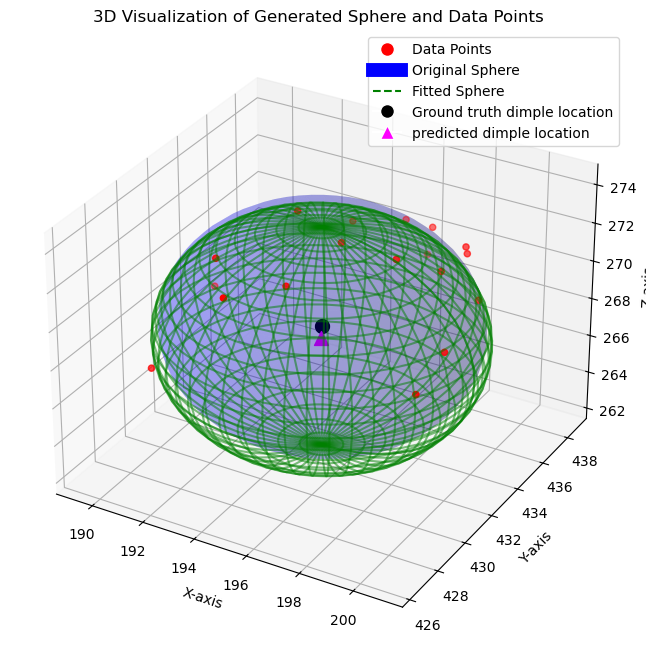

True Center: (194.9864, 432.5953, 268.3413)
True Radius: 5.5896

Estimated Center: (195.1943, 432.1561, 268.0554)
Estimated Radius: 5.7677
Sum of Squared Residuals: 9.1684e+00

Total Position Error: 0.5638
Total Radius Error: 0.1781


In [62]:
# Fit a sphere to the generated points
center, radius, residuals = fit_sphere(points)

# Prepare data for plotting
x_points = [p[0] for p in points]
y_points = [p[1] for p in points]
z_points = [p[2] for p in points]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x_points, y_points, z_points, color='r', label='Measurements')
ax.scatter(x0, y0, z0, color='black', marker='o', s=100, label='Ground truth dimple location')
ax.scatter(center[0], center[1], center[2], color='magenta', marker='^', s=100, label='predicted dimple location')


# Create data for the original sphere surface
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x_sphere = x0 + r * np.cos(u) * np.sin(v)
y_sphere = y0 + r * np.sin(u) * np.sin(v)
z_sphere = z0 + r * np.cos(v)

# Plot the original sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2, label='Ground Truth')

# Optionally, plot the fitted sphere
x_fit_sphere = center[0] + radius * np.cos(u) * np.sin(v)
y_fit_sphere = center[1] + radius * np.sin(u) * np.sin(v)
z_fit_sphere = center[2] + radius * np.cos(v)
ax.plot_wireframe(x_fit_sphere, y_fit_sphere, z_fit_sphere, color='g', alpha=0.5, label='Fitted Sphere')

# Set plot labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of Generated Sphere and Data Points')

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data Points',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], linestyle='-', markerfacecolor='b', color='b', label='Original Sphere', linewidth=10),
                   Line2D([0], [0], linestyle='--', color='g', label='Fitted Sphere'),
                   Line2D([0], [0], marker='o', color='w', label='Ground truth dimple location',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='predicted dimple location',
                          markerfacecolor='magenta', markersize=10)]

ax.legend(handles=legend_elements)

# Show the plot
plt.show()

# Print the estimated and true sphere parameters
print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
print(f"True Radius: {r:.4f}")
print(f"\nEstimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
print(f"Estimated Radius: {radius:.4f}")
print(f"Sum of Squared Residuals: {residuals:.4e}\n")

print(f"Total Position Error: {total_pos_error(center, x0, y0, z0):.4f}")
print(f"Total Radius Error: {total_radius_error(radius, r):.4f}")

In [63]:
i = 0
while(i < 20):
    i += 1
    # Generate test data
    points, r, x0, y0, z0 = generate_sphere_points(random.uniform(0, 5))
    # Print predicted results
    center, radius, residual_sum = fit_sphere(points)

    print("Trial ", i, ":")
    print(f"Total Position Error: {total_pos_error(center, x0, y0, z0):.4f}")
    print(f"Total Radius Error: {total_radius_error(radius, r):.4f}\n")
    


Trial  1 :
Total Position Error: 8.7806
Total Radius Error: 5.3583

Trial  2 :
Total Position Error: 4.1895
Total Radius Error: 0.6732

Trial  3 :
Total Position Error: 9.6122
Total Radius Error: 7.3830

Trial  4 :
Total Position Error: 9760.9078
Total Radius Error: 9738.7391

Trial  5 :
Total Position Error: 0.5130
Total Radius Error: 0.2336

Trial  6 :
Total Position Error: 7.1089
Total Radius Error: 2.7331

Trial  7 :
Total Position Error: 456.2960
Total Radius Error: 450.7665

Trial  8 :
Total Position Error: 1.3953
Total Radius Error: 0.9867

Trial  9 :
Total Position Error: 19.7385
Total Radius Error: 9.3117

Trial  10 :
Total Position Error: 5.0015
Total Radius Error: 4.7344

Trial  11 :
Total Position Error: 2.5122
Total Radius Error: 2.8954

Trial  12 :
Total Position Error: 4.6783
Total Radius Error: 0.6035

Trial  13 :
Total Position Error: 1.3534
Total Radius Error: 0.0494

Trial  14 :
Total Position Error: 2.9300
Total Radius Error: 1.0414

Trial  15 :
Total Position Error